In [14]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git
%config Completer.use_jedi = False

fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


train - 3068 images
val - 341 images
test - 372 images

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras


# Load Image

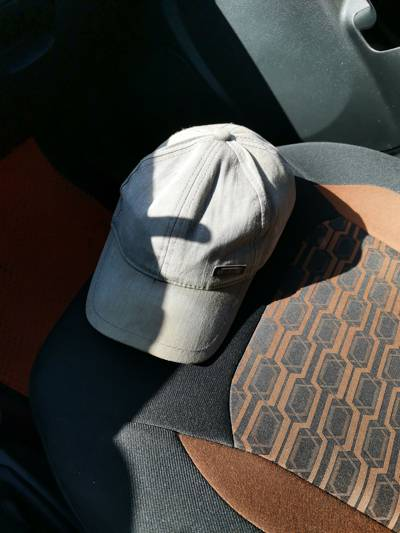

In [16]:
from tensorflow.keras.preprocessing.image import load_img

path = '/content/clothing-dataset-small'
one_image = '/train/hat/eb9759ae-a502-438c-b302-3c26761fe921.jpg'
fullImagePath = path + one_image

load_img(fullImagePath)

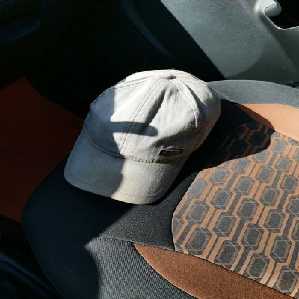

In [17]:
# resize the image
load_img(fullImagePath, target_size=(299,299))

# use pretrained model

In [18]:
from tensorflow.keras.applications.xception import Xception,preprocess_input, decode_predictions


In [19]:
model = Xception(
    weights = 'imagenet',      #use pretrained model
    input_shape = (299,299,3)
)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
img = load_img(fullImagePath, target_size=(299,299))   #image object

In [21]:
X = np.array([img])

X.shape

(1, 299, 299, 3)

In [22]:
# prepare the input
X = preprocess_input(X)

In [23]:
X.shape

(1, 299, 299, 3)

In [24]:
# do the predcition
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step


In [25]:
pred.shape

(1, 1000)

In [26]:
pred[0, :10]

array([1.8821457e-04, 1.5743550e-04, 9.5200296e-05, 2.6190621e-05,
       1.2777936e-04, 1.6820399e-04, 3.9163759e-05, 3.6855352e-05,
       5.4871070e-05, 2.1754013e-05], dtype=float32)

In [27]:
# convert prediction to human readable format
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n04162706', 'seat_belt', np.float32(0.4836273)),
  ('n03530642', 'honeycomb', np.float32(0.09660602)),
  ('n04591157', 'Windsor_tie', np.float32(0.064980835)),
  ('n03938244', 'pillow', np.float32(0.033908024)),
  ('n04350905', 'suit', np.float32(0.028448733))]]

# Transfer Learning

In [33]:
train_path = '/content/clothing-dataset-small/train'
val_path = '/content/clothing-dataset-small/validation'

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
image_size = (150,150)
batch_size =32

In [37]:
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [38]:
train_ds = train_gen.flow_from_directory(
    train_path,
    target_size = image_size,
    batch_size = batch_size
)

Found 3068 images belonging to 10 classes.


In [39]:
# validation dataset
val_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)
val_ds = train_gen.flow_from_directory(
    val_path,
    target_size = image_size,
    batch_size = batch_size
)


Found 341 images belonging to 10 classes.


# Model Creation

In [40]:
base_model  = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
base_model.trainable = False #freeze the base model to stop being trained

In [42]:
inputs = keras.Input(shape = (150,150,3))   #input images of size 150x150x3

base = base_model(inputs, training=False)       #to extract the high level features

# pooling = keras.layers.GlobalAveragePooling2D()
# vector = pooling(base)
vector = keras.layers.GlobalAveragePooling2D()(base)   #extract the vector  and convert the ouptu  of base to vector

outputs = keras.layers.Dense(10)(vector)

model = keras.Model(inputs, outputs)

# Model Training

In [43]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [44]:
model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = ['accuracy']
)

In [45]:
history = model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 377ms/step - accuracy: 0.6008 - loss: 1.6548 - val_accuracy: 0.7713 - val_loss: 0.7979
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8279 - loss: 0.5344 - val_accuracy: 0.7947 - val_loss: 0.8985
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8616 - loss: 0.3916 - val_accuracy: 0.7977 - val_loss: 0.9767
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9093 - loss: 0.2602 - val_accuracy: 0.7977 - val_loss: 0.9680
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9270 - loss: 0.2046 - val_accuracy: 0.8006 - val_loss: 0.8657
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9716 - loss: 0.0918 - val_accuracy: 0.8152 - val_loss: 0.8653
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9745 - loss: 0.0796 - val_accuracy: 0.8211 - val_loss: 0.8831
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9870 - loss: 0.0519 - val_accuracy: 0.7889 - val_loss: 

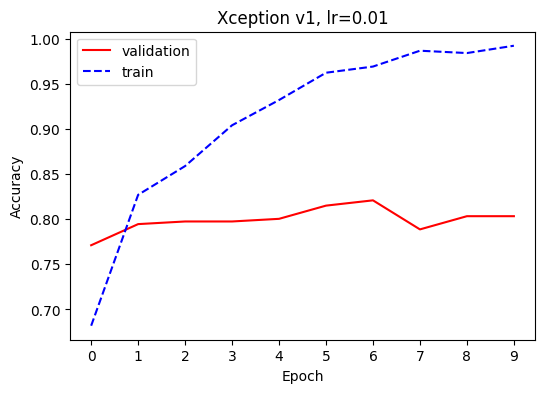

In [46]:
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='red', linestyle='solid', label='validation')
plt.plot(epochs, train, color='blue', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(10))

plt.legend()

plt.show()

In [47]:
def make_model(lr):
    base_model  = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
    )

    base_model.trainable = False #freeze the base model to stop being trained
    inputs = keras.Input(shape = (150,150,3))   #input images of size 150x150x3

    base = base_model(inputs, training=False)       #to extract the high level features
    vector = keras.layers.GlobalAveragePooling2D()(base)   #extract the vector  and convert the ouptut  of base to vector

    outputs = keras.layers.Dense(10)(vector)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(lr)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = ['accuracy']
    )

    return model

In [48]:
#learning rate = 0.001
model = make_model(0.001)
history_001 = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 207ms/step - accuracy: 0.5052 - loss: 1.4653 - val_accuracy: 0.7595 - val_loss: 0.7193
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7834 - loss: 0.6554 - val_accuracy: 0.7889 - val_loss: 0.6184
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8347 - loss: 0.5138 - val_accuracy: 0.8094 - val_loss: 0.5724
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8652 - loss: 0.4340 - val_accuracy: 0.8123 - val_loss: 0.5657
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8899 - loss: 0.3691 - val_accuracy: 0.8123 - val_loss: 0.5500
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9181 - loss: 0.3072 - val_accuracy: 0.8123 - val_loss: 0.5416
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9247 - loss: 0.2836 - val_accuracy: 0.8240 - val_loss: 0.5232
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9378 - loss: 0.2536 - val_accuracy: 0.8270 -

In [49]:
#learning rate = 0.0001
model = make_model(0.0001)
history_0001 = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 202ms/step - accuracy: 0.2232 - loss: 2.1635 - val_accuracy: 0.4780 - val_loss: 1.6191
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.5291 - loss: 1.4690 - val_accuracy: 0.5748 - val_loss: 1.2798
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.6214 - loss: 1.1893 - val_accuracy: 0.6393 - val_loss: 1.0953
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6871 - loss: 1.0180 - val_accuracy: 0.6716 - val_loss: 0.9831
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7175 - loss: 0.9196 - val_accuracy: 0.6891 - val_loss: 0.9027
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7182 - loss: 0.8690 - val_accuracy: 0.7185 - val_loss: 0.8491
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.7568 - loss: 0.7805 - val_accuracy: 0.7302 - val_loss: 0.8114
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.7535 - loss: 0.7634 - val_accuracy: 0.7507 -

In [50]:
def model_plot(history, v,lr):
    plt.figure(figsize=(6, 4))

    epochs = history.epoch
    val = history.history['val_accuracy']
    train = history.history['accuracy']

    plt.plot(epochs, val, color='red', linestyle='solid', label='validation')
    plt.plot(epochs, train, color='blue', linestyle='dashed', label='train')

    plt.title(f'Xception {v},{lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.xticks(np.arange(10))

    plt.legend()

    plt.show()

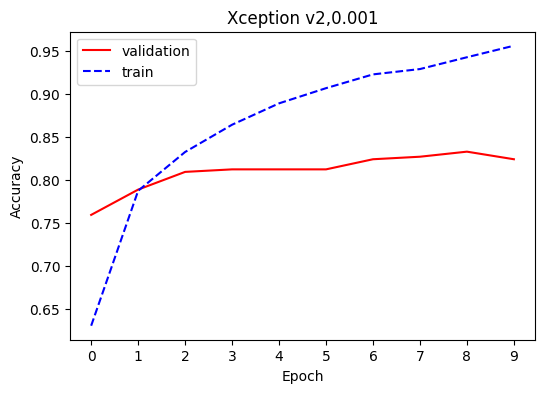

In [51]:
model_plot(history_001, 'v2', 0.001)

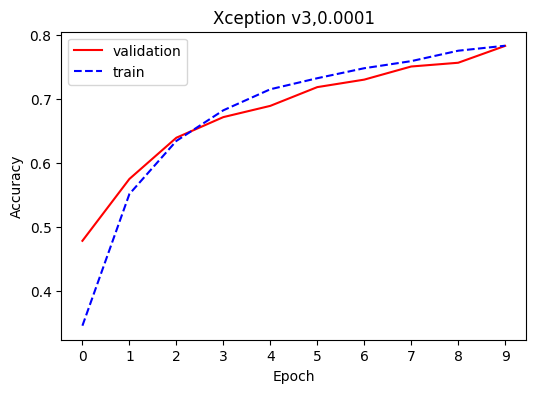

In [52]:
model_plot(history_0001, 'v3', 0.0001)


In [53]:
epochs = np.arange(10)

val_01 = history.history['val_accuracy']
val_001 = history_001.history['val_accuracy']
val_0001 = history_0001.history['val_accuracy']



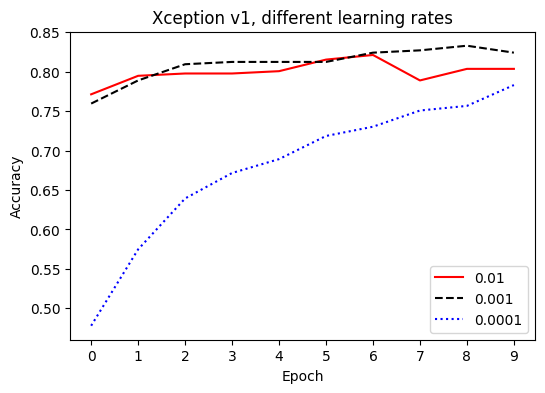

In [55]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val_01, color='red', linestyle='solid', label='0.01')
plt.plot(epochs, val_001, color='black', linestyle='dashed', label='0.001')
plt.plot(epochs, val_0001, color='blue', linestyle='dotted', label='0.0001')


plt.title('Xception v1, different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()

plt.savefig('xception_v1_all_lr.svg')

plt.show()

1. lr = 0.01 = 0.8211
2. lr -=0.001 = 0.8387
3. lr = 0.0001 = 0.8065

In [56]:
#save the model

model = make_model(0.001)

In [57]:
checkpoints = [keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    monitor = 'val_accuracy',
    save_best_only = True,
    mode = 'max'
)]

In [58]:
history_001 = model.fit(
    train_ds, epochs = 10, validation_data = val_ds,
    callbacks = checkpoints
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5282 - loss: 1.4375

96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 199ms/step - accuracy: 0.5293 - loss: 1.4340 - val_accuracy: 0.7449 - val_loss: 0.7464
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7777 - loss: 0.6457

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.7777 - loss: 0.6456 - val_accuracy: 0.7947 - val_loss: 0.6311
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8214 - loss: 0.5228

96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8214 - loss: 0.5227 - val_accuracy: 0.8094 - val_loss: 0.5819
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8616 - loss: 0.4248

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8616 - loss: 0.4249 - val_accuracy: 0.8270 - val_loss: 0.5594
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9013 - loss: 0.3565 - val_accuracy: 0.8152 - val_loss: 0.5496
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9196 - loss: 0.3129 - val_accuracy: 0.8211 - val_loss: 0.5477
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9181 - loss: 0.2833 - val_accuracy: 0.8270 - val_loss: 0.5485
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9363 - loss: 0.2527 - val_accuracy: 0.8152 - val_loss: 0.5302
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9462 - loss: 0.2217

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9461 - loss: 0.2219 - val_accuracy: 0.8358 - val_loss: 0.5298
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9562 - loss: 0.1985 - val_accuracy: 0.8152 - val_loss: 0.5264


# adding inner dense layer


In [59]:
def make_model(lr, droprate):
    base_model  = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
    )

    base_model.trainable = False #freeze the base model to stop being trained
    inputs = keras.Input(shape = (150,150,3))   #input images of size 150x150x3

    base = base_model(inputs, training=False)       #to extract the high level features
    vector = keras.layers.GlobalAveragePooling2D()(base)   #extract the vector  and convert the ouptut  of base to vector

    inner = keras.layers.Dense(100, activation = 'relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(lr)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = ['accuracy']
    )

    return model

## Train the model with drop and inner layer


1. drop =0.0
2. drop = 0.2
3. drop =0.5
4. drop = 0.8

In [60]:
#drop rate =0
model = make_model(0.001, 0.0)

history_0 = model.fit(
    train_ds, epochs = 30, validation_data = val_ds,
    callbacks = checkpoints
)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 197ms/step - accuracy: 0.5579 - loss: 1.3072 - val_accuracy: 0.7742 - val_loss: 0.6296
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.8185 - loss: 0.4915 - val_accuracy: 0.7947 - val_loss: 0.6010
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8825 - loss: 0.3529 - val_accuracy: 0.7947 - val_loss: 0.5818
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9351 - loss: 0.2400 - val_accuracy: 0.8035 - val_loss: 0.5580
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9560 - loss: 0.1671 - val_accuracy: 0.8328 - val_loss: 0.5753
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9697 - loss: 0.1303 - val_accuracy: 0.8035 - val_loss: 0.6073
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9846 - loss: 0.0933 - val_accuracy: 0.8182 - val_loss: 0.5660
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9899 - loss: 0.0638 - val_accuracy: 0.8094 -

In [61]:
#drop rate =0
model = make_model(0.001, 0.2)

history_02 = model.fit(
    train_ds, epochs = 30, validation_data = val_ds,
    callbacks = checkpoints
)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 212ms/step - accuracy: 0.5316 - loss: 1.4024 - val_accuracy: 0.7859 - val_loss: 0.6393
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.7680 - loss: 0.6315 - val_accuracy: 0.7977 - val_loss: 0.5802
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8364 - loss: 0.4567 - val_accuracy: 0.7977 - val_loss: 0.5696
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.8872 - loss: 0.3402 - val_accuracy: 0.8094 - val_loss: 0.5330
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9146 - loss: 0.2765 - val_accuracy: 0.8094 - val_loss: 0.5346
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9378 - loss: 0.2196 - val_accuracy: 0.8240 - val_loss: 0.5511
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9437 - loss: 0.1913 - val_accuracy: 0.8211 - val_loss: 0.5487
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9559 - loss: 0.1421 - val_accuracy: 0.8270 -

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9817 - loss: 0.0826 - val_accuracy: 0.8387 - val_loss: 0.5768
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9852 - loss: 0.0732 - val_accuracy: 0.8358 - val_loss: 0.5815
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9830 - loss: 0.0732

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9830 - loss: 0.0732 - val_accuracy: 0.8416 - val_loss: 0.5676
Epoch 13/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9872 - loss: 0.0622 - val_accuracy: 0.8182 - val_loss: 0.6369
Epoch 14/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9843 - loss: 0.0554 - val_accuracy: 0.8152 - val_loss: 0.6187
Epoch 15/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9889 - loss: 0.0512 - val_accuracy: 0.8211 - val_loss: 0.6357
Epoch 16/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9932 - loss: 0.0397 - val_accuracy: 0.8240 - val_loss: 0.6248
Epoch 17/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9907 - loss: 0.0363 - val_accuracy: 0.8152 - val_loss: 0.6584
Epoch 18/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9975 - loss: 0.0254 - val_accuracy: 0.8328 - val_loss: 0.6377
Epoch 19/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.9954 - loss: 0.0267 - val_accuracy: 0.8211 - val_l

96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9958 - loss: 0.0255 - val_accuracy: 0.8475 - val_loss: 0.6724
Epoch 22/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9956 - loss: 0.0259 - val_accuracy: 0.8123 - val_loss: 0.7301
Epoch 23/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9972 - loss: 0.0208 - val_accuracy: 0.8475 - val_loss: 0.7049
Epoch 24/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9949 - loss: 0.0254 - val_accuracy: 0.8123 - val_loss: 0.7614
Epoch 25/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9994 - loss: 0.0144 - val_accuracy: 0.8270 - val_loss: 0.7358
Epoch 26/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9928 - loss: 0.0237 - val_accuracy: 0.8211 - val_loss: 0.8238
Epoch 27/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9904 - loss: 0.0312 - val_accuracy: 0.8182 - val_loss: 0.8040
Epoch 28/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.7977 - val_l

In [62]:
#drop rate =0
model = make_model(0.001, 0.5)

history_05 = model.fit(
    train_ds, epochs = 30, validation_data = val_ds,
    callbacks = checkpoints
)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 209ms/step - accuracy: 0.4712 - loss: 1.5799 - val_accuracy: 0.7449 - val_loss: 0.7503
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.7072 - loss: 0.8387 - val_accuracy: 0.7918 - val_loss: 0.6134
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.7684 - loss: 0.6926 - val_accuracy: 0.7830 - val_loss: 0.6270
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7930 - loss: 0.5725 - val_accuracy: 0.8152 - val_loss: 0.5721
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8280 - loss: 0.4871 - val_accuracy: 0.8123 - val_loss: 0.5667
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.8450 - loss: 0.4462 - val_accuracy: 0.8006 - val_loss: 0.5872
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.8619 - loss: 0.4047 - val_accuracy: 0.8446 - val_loss: 0.5342
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8696 - loss: 0.3640 - val_accuracy: 0.7977 -

In [63]:
#drop rate =0
model = make_model(0.001, 0.8)

history_08 = model.fit(
    train_ds, epochs = 30, validation_data = val_ds,
    callbacks = checkpoints
)


Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 202ms/step - accuracy: 0.3023 - loss: 2.0644 - val_accuracy: 0.6745 - val_loss: 1.1064
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.5046 - loss: 1.4392 - val_accuracy: 0.7302 - val_loss: 0.9222
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.5425 - loss: 1.2821 - val_accuracy: 0.7331 - val_loss: 0.8451
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.5652 - loss: 1.1905 - val_accuracy: 0.7889 - val_loss: 0.7695
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.6212 - loss: 1.0857 - val_accuracy: 0.7566 - val_loss: 0.7057
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.6310 - loss: 1.0649 - val_accuracy: 0.7830 - val_loss: 0.6894
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6452 - loss: 0.9727 - val_accuracy: 0.8035 - val_loss: 0.6733
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.6308 - loss: 0.9817 - val_accuracy: 0.8152 -

In [64]:
epochs = history_0.epoch

train00 = history_0.history['accuracy']
train02 = history_02.history['accuracy']
train05 = history_05.history['accuracy']
train08 = history_08.history['accuracy']

val00 = history_0.history['val_accuracy']
val02 = history_02.history['val_accuracy']
val05 = history_05.history['val_accuracy']
val08 = history_08.history['val_accuracy']

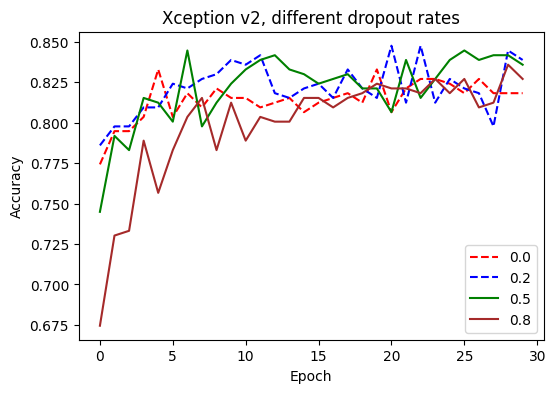

In [65]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val00, color='red', linestyle='dashed', label='0.0')
plt.plot(epochs, val02, color='blue', linestyle='dashed', label='0.2')
plt.plot(epochs, val05, color='green', linestyle='solid', label='0.5')
plt.plot(epochs, val08, color='brown', linestyle='solid', label='0.8')


plt.title('Xception v2, different dropout rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('xception_v2_dropout.svg')

plt.show()

Accuracy
1. 0.0 = 82%
2. 0.2 = 82%
3. 0.5 = 84.16%
4. 0.8 = 81.52%


final parameterds = lr 0.001 dropout rate = 0.5

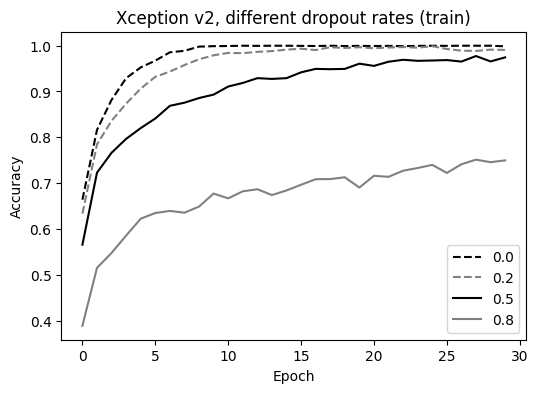

In [66]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, train00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, train02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, train05, color='black', linestyle='solid', label='0.5')
plt.plot(epochs, train08, color='grey', linestyle='solid', label='0.8')


plt.title('Xception v2, different dropout rates (train)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('xception_v2_dropout_train.svg')

plt.show()

# data augmentation

In [67]:
train_gen = ImageDataGenerator(
    shear_range=10.0,
    zoom_range = 0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

In [ ]:
# train_path, image_size,batch_size

In [68]:
train_ds = train_gen.flow_from_directory(
    train_path,
    target_size = image_size,
    batch_size = batch_size
)

Found 3068 images belonging to 10 classes.


In [69]:
#validation data
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    val_path,
    target_size = image_size,
    batch_size = batch_size
)

Found 341 images belonging to 10 classes.


In [70]:
#drop rate =0
model = make_model(0.001, 0.5)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(
    train_ds, epochs = 50, validation_data = val_ds,callbacks=callbacks
)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.4503 - loss: 1.6288

96/96 ━━━━━━━━━━━━━━━━━━━━ 44s 371ms/step - accuracy: 0.4514 - loss: 1.6257 - val_accuracy: 0.7654 - val_loss: 0.7628
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.7094 - loss: 0.8761

96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 242ms/step - accuracy: 0.7093 - loss: 0.8762 - val_accuracy: 0.7830 - val_loss: 0.6732
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7367 - loss: 0.7805

96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 239ms/step - accuracy: 0.7367 - loss: 0.7805 - val_accuracy: 0.8035 - val_loss: 0.6337
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.7575 - loss: 0.7217

96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.7574 - loss: 0.7219 - val_accuracy: 0.8240 - val_loss: 0.5910
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.7588 - loss: 0.6753 - val_accuracy: 0.8182 - val_loss: 0.6024
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - accuracy: 0.7936 - loss: 0.6224 - val_accuracy: 0.8035 - val_loss: 0.5949
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 232ms/step - accuracy: 0.7954 - loss: 0.5748 - val_accuracy: 0.8211 - val_loss: 0.5619
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - accuracy: 0.8068 - loss: 0.5524 - val_accuracy: 0.8152 - val_loss: 0.5552
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.8203 - loss: 0.5384 - val_accuracy: 0.8182 - val_loss: 0.5608
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8193 - loss: 0.4935

96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step - accuracy: 0.8194 - loss: 0.4936 - val_accuracy: 0.8299 - val_loss: 0.5762
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.8284 - loss: 0.4946 - val_accuracy: 0.8211 - val_loss: 0.5785
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - accuracy: 0.8299 - loss: 0.4874 - val_accuracy: 0.8270 - val_loss: 0.5344
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.8506 - loss: 0.4121 - val_accuracy: 0.8123 - val_loss: 0.5393
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 221ms/step - accuracy: 0.8569 - loss: 0.4196 - val_accuracy: 0.8065 - val_loss: 0.5862
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.8583 - loss: 0.3950 - val_accuracy: 0.8211 - val_loss: 0.5909
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 232ms/step - accuracy: 0.8461 - loss: 0.4069 - val_accuracy: 0.8299 - val_loss: 0.5483
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - accuracy: 0.8678 - loss: 0.3914 - val_accuracy

96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.8804 - loss: 0.3289 - val_accuracy: 0.8475 - val_loss: 0.5566
Epoch 23/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 240ms/step - accuracy: 0.8757 - loss: 0.3260 - val_accuracy: 0.8328 - val_loss: 0.5603
Epoch 24/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - accuracy: 0.8966 - loss: 0.3084 - val_accuracy: 0.8328 - val_loss: 0.6071
Epoch 25/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - accuracy: 0.8903 - loss: 0.3147 - val_accuracy: 0.8328 - val_loss: 0.5827
Epoch 26/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - accuracy: 0.8962 - loss: 0.2910 - val_accuracy: 0.8299 - val_loss: 0.5903
Epoch 27/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.8857 - loss: 0.3162 - val_accuracy: 0.8358 - val_loss: 0.5995
Epoch 28/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.8925 - loss: 0.3040 - val_accuracy: 0.8240 - val_loss: 0.6148
Epoch 29/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - accuracy: 0.9083 - loss: 0.2503 - val_accuracy

96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 234ms/step - accuracy: 0.9139 - loss: 0.2367 - val_accuracy: 0.8563 - val_loss: 0.5689
Epoch 38/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.9208 - loss: 0.2481 - val_accuracy: 0.8328 - val_loss: 0.6286
Epoch 39/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.9174 - loss: 0.2378 - val_accuracy: 0.8328 - val_loss: 0.6386
Epoch 40/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.9257 - loss: 0.1960 - val_accuracy: 0.8475 - val_loss: 0.6027
Epoch 41/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step - accuracy: 0.9213 - loss: 0.2207 - val_accuracy: 0.8446 - val_loss: 0.6167
Epoch 42/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - accuracy: 0.9148 - loss: 0.2366 - val_accuracy: 0.8270 - val_loss: 0.6032
Epoch 43/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step - accuracy: 0.9257 - loss: 0.2023 - val_accuracy: 0.8035 - val_loss: 0.6778
Epoch 44/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.9125 - loss: 0.2345 - val_accuracy

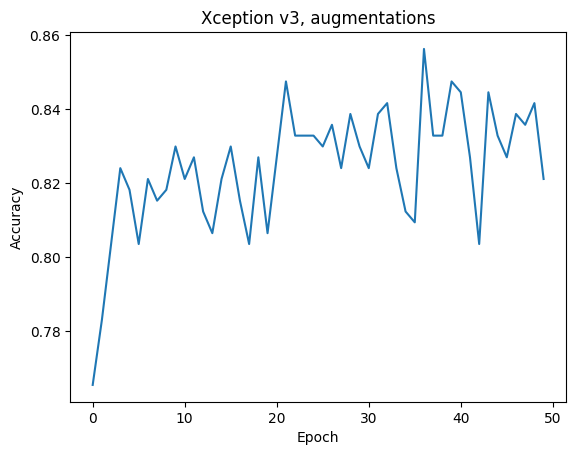

In [71]:
epochs = history.epoch
accuracy = history.history['val_accuracy']


plt.plot(epochs, accuracy)
plt.title('Xception v3, augmentations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# plt.savefig('xception_v3_aug.svg')

plt.show()

In [72]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,479,212 (81.94 MB)

 Trainable params: 205,910 (804.34 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 411,822 (1.57 MB)

# Model for larger image(Optional)

In [73]:
def make_model_large(lr, droprate):
    """For larger image size - 299x299x3"""
    base_model  = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (299,299,3)
    )

    base_model.trainable = False #freeze the base model to stop being trained
    inputs = keras.Input(shape = (299,299,3))   #input images of size 150x150x3

    base = base_model(inputs, training=False)       #to extract the high level features
    vector = keras.layers.GlobalAveragePooling2D()(base)   #extract the vector  and convert the ouptut  of base to vector

    inner = keras.layers.Dense(100, activation = 'relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(lr)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = ['accuracy']
    )

    return model

In [74]:
image_size=(299,299)
batch_size = 32

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    train_path,
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    val_path,
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [75]:
model = make_model_large(0.001, 0.5)

In [76]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,067,390 (80.37 MB)

 Trainable params: 205,910 (804.34 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
# For traiing the model
# history_lm = model.fit(train_ds, epochs=10, validation_data=val_ds)
#

# Test the model

In [77]:
labels = {
    0: 'dress',
    1: 'hat',
    2: 'longsleeve',
    3: 'outwear',
    4: 'pants',
    5: 'shirt',
    6: 'shoes',
    7: 'shorts',
    8: 'skirt',
    9: 't-shirt'
}

In [78]:
image_size = (150,150) #image size

In [81]:
model = keras.models.load_model('/content/xception_v3_37_0.856.h5')

In [82]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,067,392 (80.37 MB)

 Trainable params: 205,910 (804.34 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 2 (12.00 B)

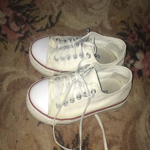

In [83]:
from tensorflow.keras.preprocessing.image import load_img


path = '/content/clothing-dataset-small/validation/shoes/454fd50e-89eb-412b-b16c-17f1730ed9b5.jpg'
img = load_img(path)
img = img.resize((150, 150))
img

#### Preprocess the image

In [84]:
x=np.array(img)
X = np.array([x])
X.shape

(1, 150, 150, 3)

In [85]:
X = preprocess_input(X)

In [86]:
X.shape

(1, 150, 150, 3)

In [87]:
# predict

pred = model.predict(X)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


array([[ -4.9904838,   8.064873 ,  -9.515615 , -19.018099 , -11.596423 ,
         -8.531493 ,  15.770331 , -18.189438 , -15.617438 ,  -8.348917 ]],
      dtype=float32)

In [88]:
pred.argmax()

np.int64(6)

In [89]:
labels[pred.argmax()]

'shoes'

In [95]:
def predictClass(path):
    img = load_img(path)
    img = img.resize((150, 150))

    X = np.array([np.array(img)])
    pred = model.predict(X)
    return img, labels[pred.argmax()]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


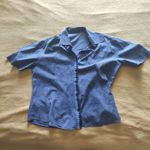

In [100]:
path = '/content/clothing-dataset-small/validation/shirt/118fb0e8-2783-4086-b81a-d2a332fbb4f2.jpg'
img, predictcls = predictClass(path)
img


In [102]:
predictcls

'shoes'

### Ananyse the model accuracy on test data

In [104]:
test_path = '/content/clothing-dataset-small/test'

In [105]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    test_path,
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 372 images belonging to 10 classes.


In [106]:
model.evaluate(test_ds)


12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7736 - loss: 0.7356


[0.539401650428772, 0.8333333134651184]

The test accuracy is 79% worse than validation and training accucary.

Reason : Becuase dataset is not too large and we have used smalleer size images.